# Analyse output from broader sweep of 0250 H-pol results using WSymbols library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter

In [74]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
BERNARD_PATH = 'Bernard/'
ELLIPSOID_PATH = 'Ellipsoid/'

### Functions

In [75]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [76]:
def get_horizontal_returned_phase(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    phase = np.angle(horizontal_field) * 180 / np.pi
    return phase


In [77]:
def get_horizontal_returned_power(df):
    horizontal_field = df['Ephi'].astype(complex).to_numpy()
    power = np.abs(horizontal_field)**2
    return power


In [78]:
def get_linear_depol_ratio(df):
    horizontal_power = get_horizontal_returned_power(df)
    vertical_power = df['Etheta'].astype(complex).to_numpy()
    vertical_power = np.abs(vertical_power)**2
    depol_ratio = 10 * np.log10(vertical_power / horizontal_power)
    return depol_ratio



## Loading in data 

In [79]:
scale_run_list = ['0206', '0553', '1000', '1588']
morpho_list = ['body_wing_leg', 'body_wing', 'body_leg', 'body']

In [80]:
ellipsoid_result_dict = {x : None for x in scale_run_list}
bernard_result_dict = {x : {y: None for y in morpho_list} for x in scale_run_list}

In [81]:
for scale in ['0206', '0553', '1000', '1588']:
        path = BASE_DRIVE_PATH + ELLIPSOID_PATH + f'{scale}/H_CSV/' + f'Ellipsoid_{scale}_sweep_H_049_df.csv'
        ellipsoid_result_dict[scale] = pd.read_csv(path)

In [82]:
morpho_type = 'body_wing_leg'

for scale in ['0206', '0553', '1000', '1588']:
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/Bernard_parameterised_H_{scale}_{morpho_type}_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()
    output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/Bernard_parameterised_H_{scale}_{morpho_type}_df.csv'
    df.to_csv(output_path)


In [83]:
morpho_type = 'body_wing_leg'

for scale in ['0206', '0553', '1000', '1588']:
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/Bernard_parameterised_H_{scale}_{morpho_type}_df.csv'
    bernard_result_dict[scale][morpho_type] = pd.read_csv(path)

In [84]:
scale = '1000'

for morphology in morpho_list:
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/Bernard_parameterised_H_{scale}_{morphology}_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()
    output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/Bernard_parameterised_H_{scale}_{morphology}_df.csv'
    df.to_csv(output_path)   

In [85]:
scale = '1000'

for morphology in morpho_list:
    print(morphology)
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/Bernard_parameterised_H_{scale}_{morphology}_df.csv'
    bernard_result_dict[scale][morphology] = pd.read_csv(path)

body_wing_leg
body_wing
body_leg
body


## Analysis with scale

Text(0.5, 1.0, 'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

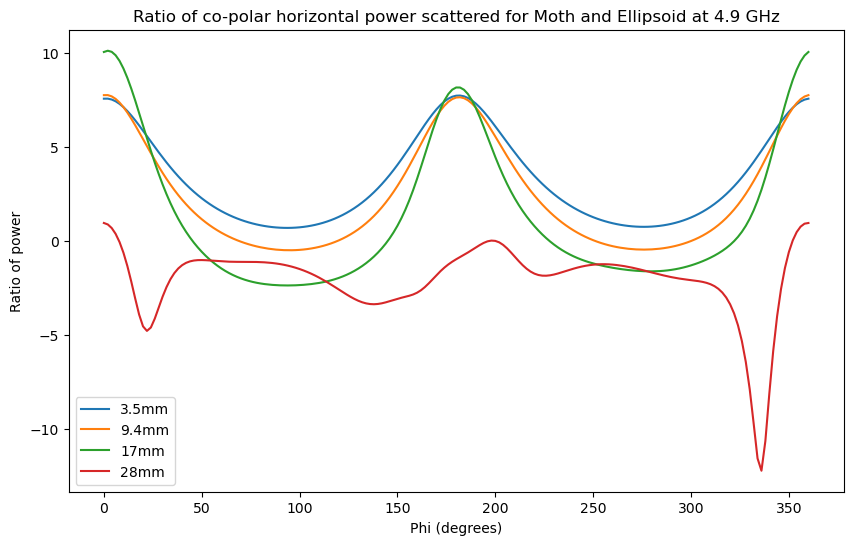

In [120]:
polarisation = 'H'
morpho_type = 'body_wing_leg'

for scale, size in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm']):
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]

    power_bernard = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)
    
    power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_ratio, label=f'{size}', linestyle = '-')
    #plt.plot(df_bernard['phi'], power_ellipsoid, label=f'{size} ellpsoid', linestyle = '--')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Ratio of power')
plt.title(f'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

Text(0.5, 1.0, 'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

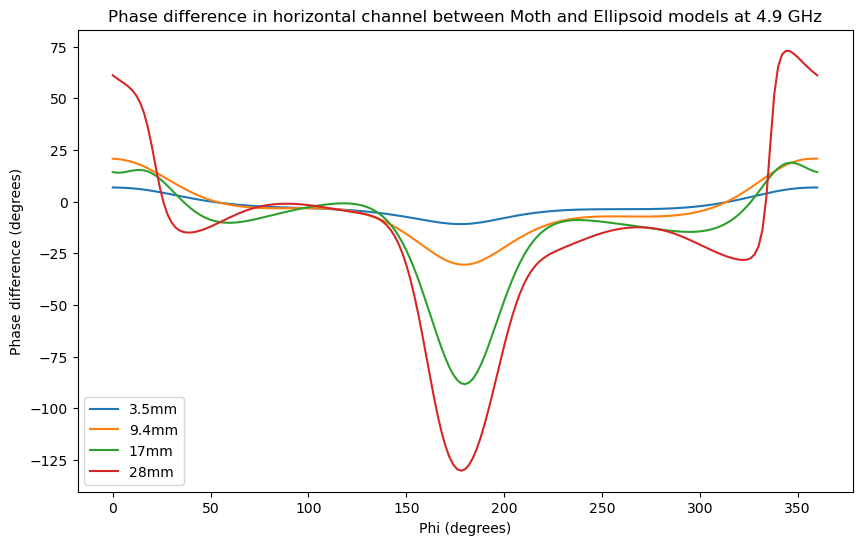

In [87]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm']):
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]
    phase_bernard = get_horizontal_returned_phase(df_bernard)
    phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)
    
    phase_difference = phase_bernard - phase_ellipsoid
    plt.plot(df_bernard['phi'], phase_difference, label=f'{size}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel for Moth and Ellipsoid models at 4.9 GHz')

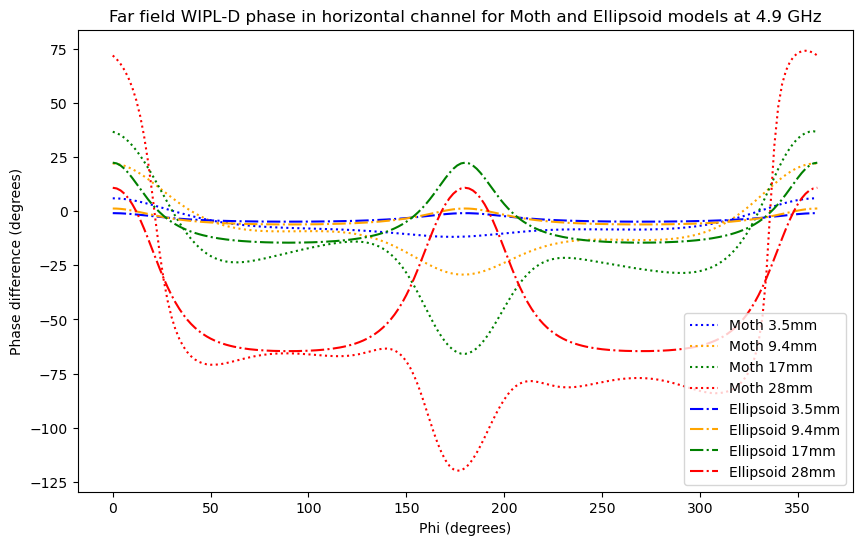

In [88]:
polarisation = 'H'
frequency = 3 #4.9GHz
model_name = 'Moth'
model = 'Bernard'
morpho_type = 'body_wing_leg'

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df = bernard_result_dict[scale][morpho_type]
    phase = get_horizontal_returned_phase(df)
    
    plt.plot(df['phi'], phase, label=f'{model_name} {size}', linestyle = ':', color=colour)

model_name = 'Ellipsoid'
model = 'Ellipsoid'

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df = ellipsoid_result_dict[scale]
    phase = get_horizontal_returned_phase(df)
    
    plt.plot(df['phi'], phase, label=f'{model_name} {size}', linestyle = '-.', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend(loc='lower right')
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel for Moth and Ellipsoid models at 4.9 GHz')

Text(0.5, 1.0, 'Linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

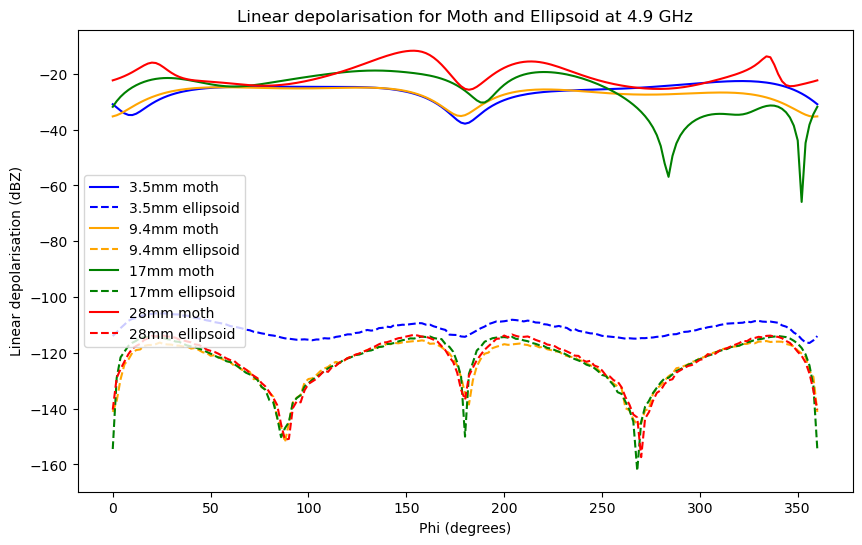

In [89]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]
    ldp_bernard = get_linear_depol_ratio(df_bernard)
    ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)
    
    # power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldp_bernard, label=f'{size} moth', linestyle = '-', color=colour)
    plt.plot(df_bernard['phi'], ldp_ellipsoid, label=f'{size} ellipsoid', linestyle = '--', color=colour)

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Linear depolarisation (dBZ)')
plt.title(f'Linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

Text(0.5, 1.0, 'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

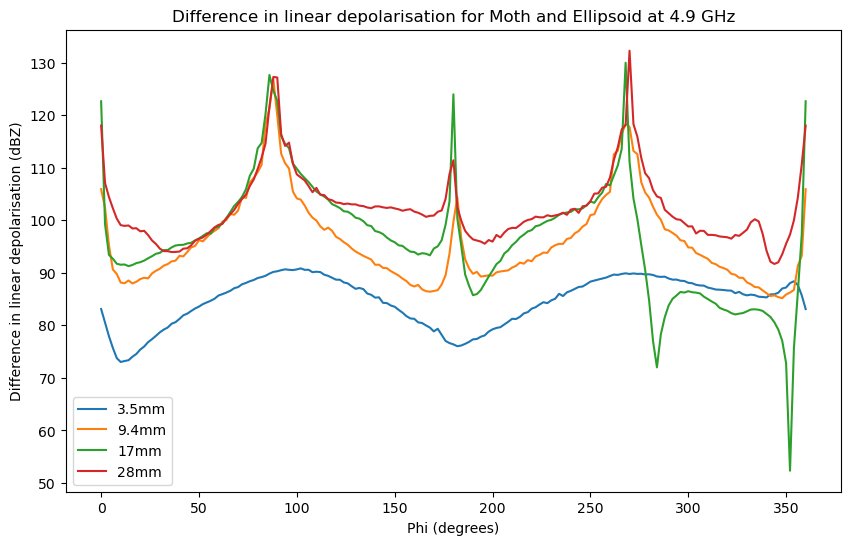

In [90]:
polarisation = 'H'
frequency = 3 #4.9GHz

for scale, size in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm']):
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]
    ldp_bernard = get_linear_depol_ratio(df_bernard)
    ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)
    
    # power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldp_bernard-ldp_ellipsoid, label=f'{size}', linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Difference in linear depolarisation (dBZ)')
plt.title(f'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

## Analysis with morphology 

1000 body_wing_leg
1000 body_wing
1000 body_leg
1000 body


Text(0.5, 1.0, 'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

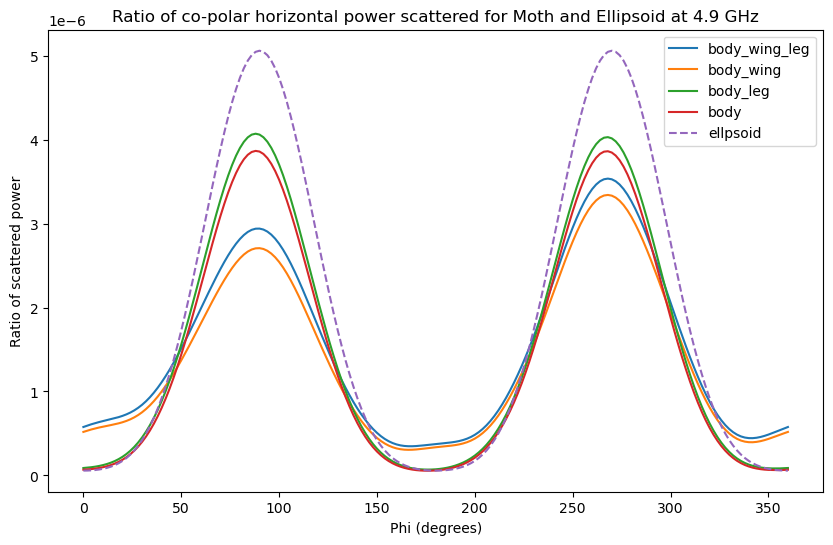

In [121]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for morpho_type in morpho_list:
    df_bernard = bernard_result_dict[scale][morpho_type]
    print(scale, morpho_type)
    df_ellipsoid = ellipsoid_result_dict[scale]
    power_bernard_full = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=morpho_type, linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Ratio of scattered power')
plt.title(f'Ratio of co-polar horizontal power scattered for Moth and Ellipsoid at 4.9 GHz')

1000 body_wing_leg
1000 body_wing
1000 body_leg
1000 body


Text(0.5, 1.0, 'Co-polar horizontal power scattered for Moth at 4.9 GHz')

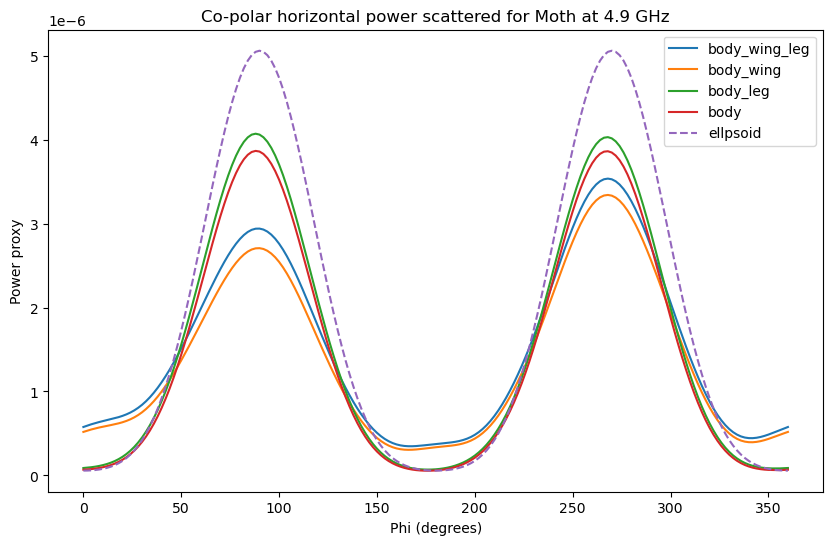

In [122]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for morpho_type in morpho_list:
    df_bernard = bernard_result_dict[scale][morpho_type]
    print(scale, morpho_type)
    df_ellipsoid = ellipsoid_result_dict[scale]
    power_bernard_full = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=morpho_type, linestyle = '-')
plt.plot(df_bernard['phi'], power_ellipsoid, label=f'ellpsoid', linestyle = '--')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Power proxy')
plt.title(f'Co-polar horizontal power scattered for Moth at 4.9 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel for Moth at 4.9 GHz')

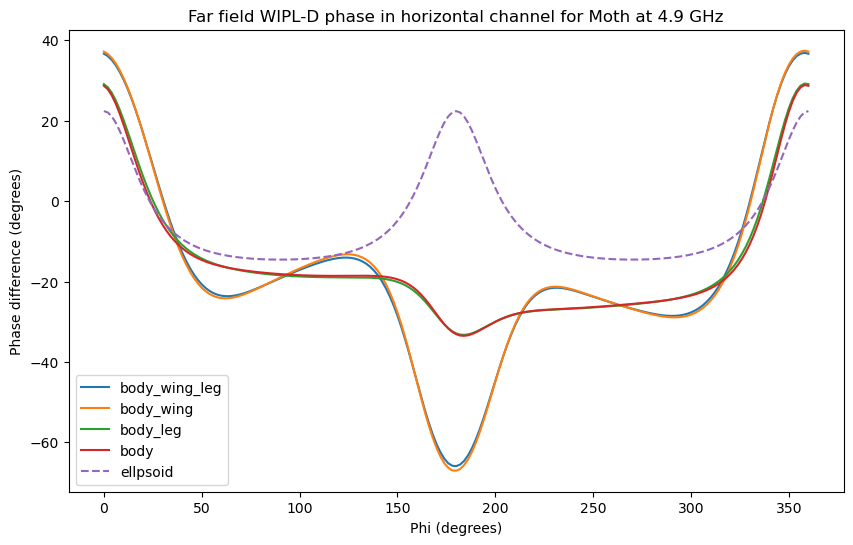

In [123]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for morpho_type in morpho_list:
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]
    phase_bernard = get_horizontal_returned_phase(df_bernard)
    phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase_bernard, label=morpho_type, linestyle = '-')
plt.plot(df_bernard['phi'], phase_ellipsoid, label=f'ellpsoid', linestyle = '--')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel for Moth at 4.9 GHz')

Text(0.5, 1.0, 'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

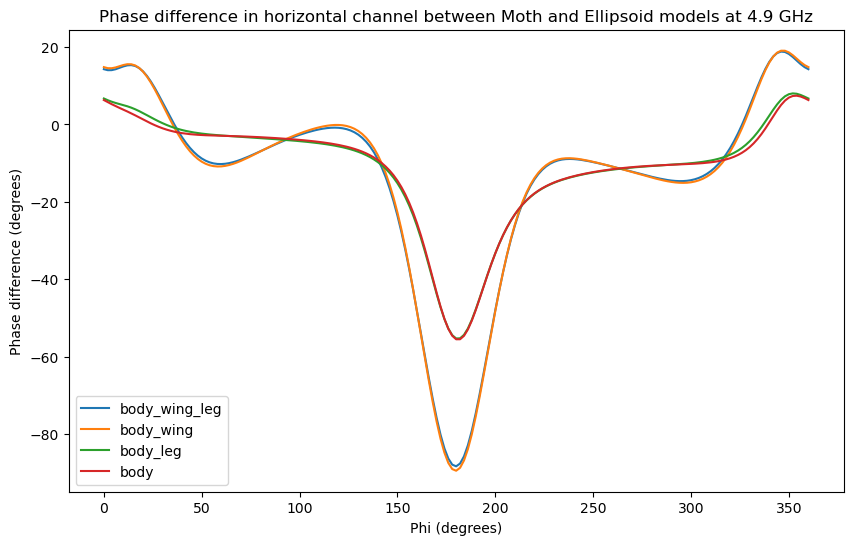

In [94]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for morpho_type in morpho_list:
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]
    phase_bernard = get_horizontal_returned_phase(df_bernard)
    phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase_bernard - phase_ellipsoid, label=morpho_type, linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

Text(0.5, 1.0, 'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

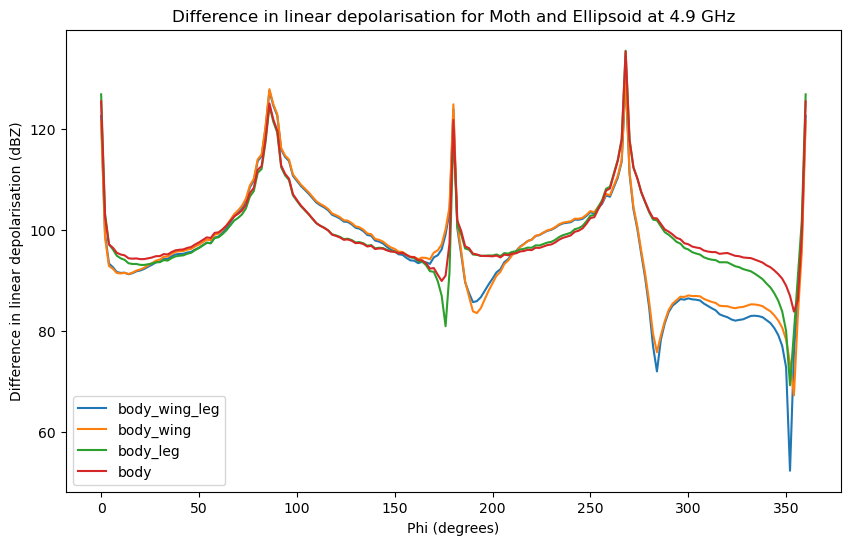

In [95]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for morpho_type in morpho_list:
    df_bernard = bernard_result_dict[scale][morpho_type]
    df_ellipsoid = ellipsoid_result_dict[scale]
    ldp_bernard = get_linear_depol_ratio(df_bernard)
    ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldp_bernard - ldp_ellipsoid, label=morpho_type, linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Difference in linear depolarisation (dBZ)')
plt.title(f'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel for Moth and Ellipsoid models at 4.9 GHz')

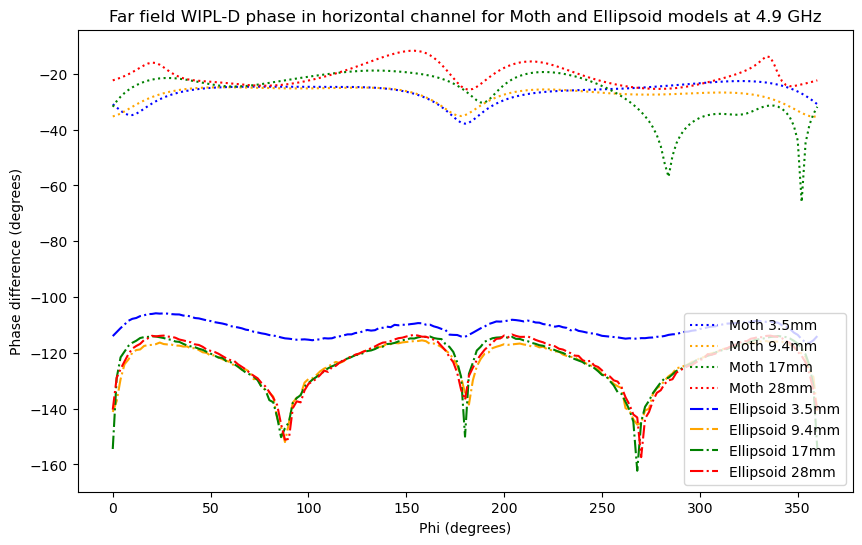

In [96]:
polarisation = 'H'
frequency = 3 #4.9GHz
model_name = 'Moth'
model = 'Bernard'
morpho_type = 'body_wing_leg'

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df = bernard_result_dict[scale][morpho_type]
    ldr = get_linear_depol_ratio(df)
    
    plt.plot(df['phi'], ldr, label=f'{model_name} {size}', linestyle = ':', color=colour)

model_name = 'Ellipsoid'
model = 'Ellipsoid'

for scale, size, colour in zip(['0206', '0553', '1000', '1588'], ['3.5mm', '9.4mm', '17mm', '28mm'], ['blue', 'orange', 'green', 'red']):
    df = ellipsoid_result_dict[scale]
    ldr = get_linear_depol_ratio(df)
    
    plt.plot(df['phi'], ldr, label=f'{model_name} {size}', linestyle = '-.', color=colour)


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend(loc='lower right')
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel for Moth and Ellipsoid models at 4.9 GHz')

## Analysis with wing position

In [97]:
wing_pos_list = ['U', 'M', 'D']

In [98]:
wing_pos_result_dict = {x : None for x in wing_pos_list}
wing_pos_result_dict['M'] = pd.read_csv(BASE_DRIVE_PATH + 'Bernard/parameterised/csv/Bernard_parameterised_H_1000_body_wing_df.csv')

In [99]:
morpho_type = 'body_wing'
scale = '1000'

for wing_pos in ['U', 'D']:
    path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/dict/Bernard_parameterised_H_{wing_pos}_{scale}_{morpho_type}_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()
    output_path = BASE_DRIVE_PATH + BERNARD_PATH + f'parameterised/csv/Bernard_parameterised_H_{wing_pos}_{morpho_type}_df.csv'
    df.to_csv(output_path)
    wing_pos_result_dict[wing_pos] = df



1000 U
1000 M
1000 D


Text(0.5, 1.0, 'Co-polar horizontal power scattered for Moth at 4.9 GHz')

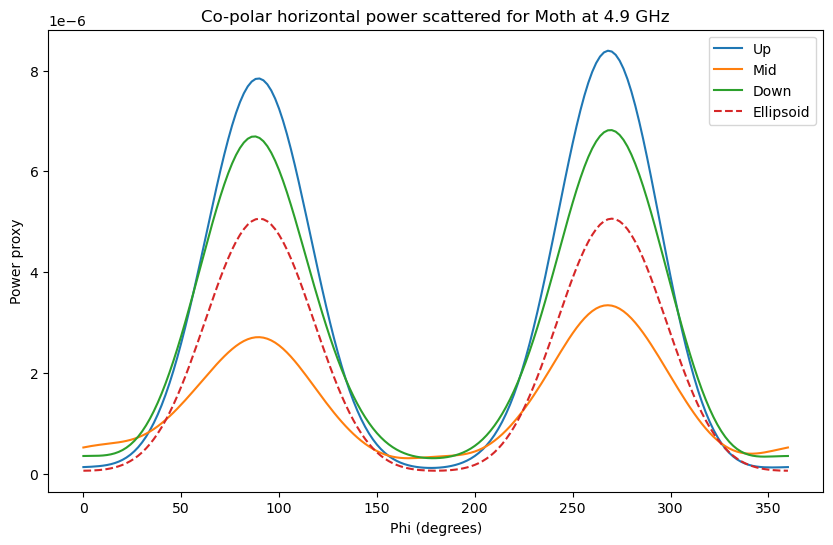

In [110]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for wing_pos, wing_pos_name in zip(wing_pos_list, ["Up", "Mid", "Down"]):
    df_bernard = wing_pos_result_dict[wing_pos]
    print(scale, wing_pos)
    df_ellipsoid = ellipsoid_result_dict[scale]
    power_bernard_full = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full, label=wing_pos_name, linestyle = '-')
plt.plot(df_bernard['phi'], power_ellipsoid, label='Ellipsoid', linestyle = '--')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Power proxy')
plt.title(f'Co-polar horizontal power scattered for Moth at 4.9 GHz')

1000 U
1000 M
1000 D


Text(0.5, 1.0, 'Ratio of scattered power between moth and ellipsoid at 4.9 GHz')

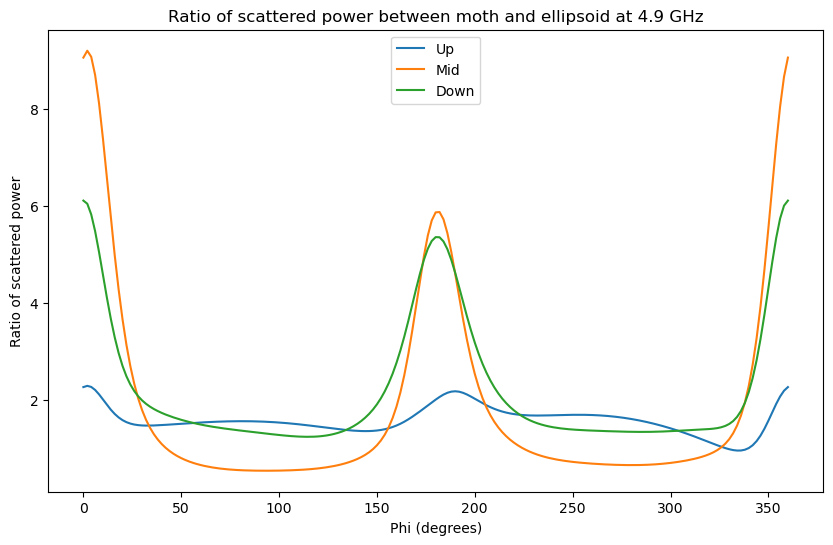

In [112]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for wing_pos, wing_pos_name in zip(wing_pos_list, ["Up", "Mid", "Down"]):
    df_bernard = wing_pos_result_dict[wing_pos]
    print(scale, wing_pos)
    df_ellipsoid = ellipsoid_result_dict[scale]
    power_bernard_full = get_horizontal_returned_power(df_bernard)
    power_ellipsoid = get_horizontal_returned_power(df_ellipsoid)
    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], power_bernard_full/power_ellipsoid, label=wing_pos_name, linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Ratio of scattered power')
plt.title(f'Ratio of scattered power between moth and ellipsoid at 4.9 GHz')

1000 U
1000 M
1000 D


Text(0.5, 1.0, 'Far field WIPL-D phase in horizontal channel for Moth at 4.9 GHz')

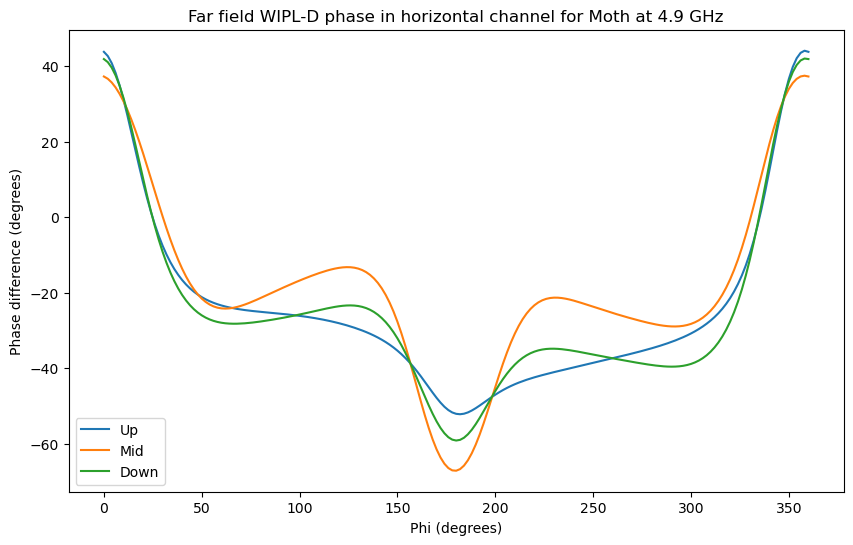

In [101]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for wing_pos, wing_pos_name in zip(wing_pos_list, ["Up", "Mid", "Down"]):
    df_bernard = wing_pos_result_dict[wing_pos]
    print(scale, wing_pos)
    df_ellipsoid = ellipsoid_result_dict[scale]
    phase_bernard = get_horizontal_returned_phase(df_bernard)
    phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase_bernard, label=wing_pos_name, linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Far field WIPL-D phase in horizontal channel for Moth at 4.9 GHz')

1000 U
1000 M
1000 D


Text(0.5, 1.0, 'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

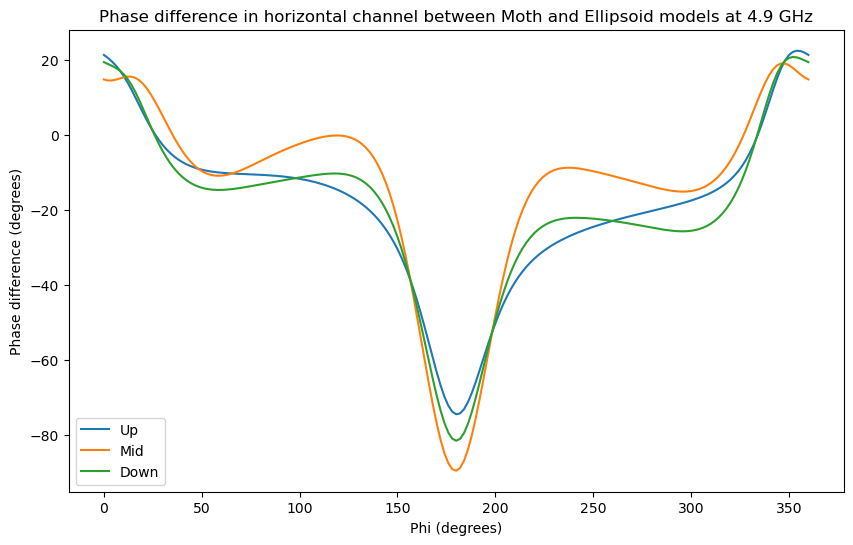

In [102]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for wing_pos, wing_pos_name in zip(wing_pos_list, ["Up", "Mid", "Down"]):
    df_bernard = wing_pos_result_dict[wing_pos]
    print(scale, wing_pos)
    df_ellipsoid = ellipsoid_result_dict[scale]
    phase_bernard = get_horizontal_returned_phase(df_bernard)
    phase_ellipsoid = get_horizontal_returned_phase(df_ellipsoid)

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    plt.plot(df_bernard['phi'], phase_bernard - phase_ellipsoid, label=wing_pos_name, linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Phase difference (degrees)')
plt.title(f'Phase difference in horizontal channel between Moth and Ellipsoid models at 4.9 GHz')

1000 U
1000 M
1000 D


Text(0.5, 1.0, 'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')

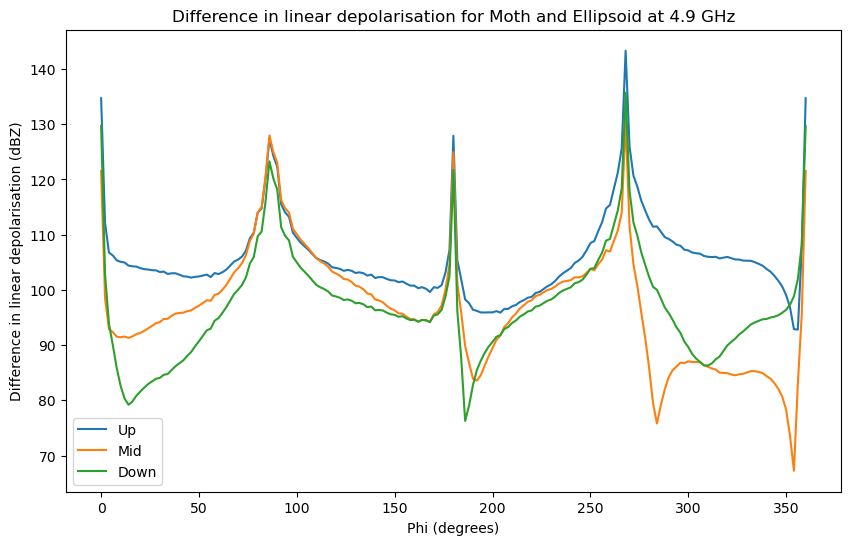

In [105]:
polarisation = 'H'
frequency = 3 #4.9GHz
scale = '1000'
size = '17mm'

for wing_pos, wing_pos_name in zip(wing_pos_list, ["Up", "Mid", "Down"]):
    df_bernard = wing_pos_result_dict[wing_pos]
    print(scale, wing_pos)
    df_ellipsoid = ellipsoid_result_dict[scale]
    ldp_bernard = get_linear_depol_ratio(df_bernard)
    ldp_ellipsoid = get_linear_depol_ratio(df_ellipsoid)
    
    # power_ratio = 10*np.log10(power_bernard/power_ellipsoid)
    plt.plot(df_bernard['phi'], ldp_bernard-ldp_ellipsoid, label=wing_pos_name, linestyle = '-')

fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Difference in linear depolarisation (dBZ)')
plt.title(f'Difference in linear depolarisation for Moth and Ellipsoid at 4.9 GHz')